In [1]:
from __future__ import print_function, division

#### 자료 안내: 여기서 다루는 내용은 아래 사이트의 내용을 참고하여 생성되었음.

https://github.com/rouseguy/intro2stats

# 가설검정 

In [2]:
import numpy as np
from __future__ import print_function, division

## 오늘의 주요 예제: 동전던지기

동전을 30번 던져서 앞면(Head)이 24번 나왔을 때, 정상적인 동전이라 할 수 있을까? 

정상적인 동전이라는 주장이 참이다라는 주장을 가설로 만들어 그 가설을 받아들일지 말지를 결정하면 된다.
이와같이 주장이 옳다는 가설을 영가설이라 부른다.

**영가설(H0)**: 정상적인 동전이라도 24번 이상 앞면이 나올 수 있다. 우연하게 발생한 사건이다.

이제 영가설이 어느정도의 확률로 맞는지 확인해보자.
그러기 위해 이항분포 확률을 활용한다.

## 이항분포

동일한 시도를 n번 시도할 때 특정 사건이 r번 나올 확률을 계산할 때 이항분포를 이용한다. 

* 조건
    * 각각의 시도는 상호 독립적이다.
    * 각각의 시도에서 특정 사건이 발생할 확률 p는 언제나 동일하다.
    

* 예제
    * 동전을 n번 던져 앞면이 r번 나올 확률들의 분포: p = 1/2
    * 주사위를 n번 던져 2보다는 큰 소수가 r번 나올 확률들이 분포: p = 1/3


이항분포를 따르는 확률분포를 $B(n, p)$로 표기한다.
이때, n번 시도해서 r번 성공할 확률 $P(r)$은 아래 식으로 구할 수 있다.

$$P(n, r, p) = {}^nC_r \cdot p^r \cdot (1-p)^{n-r}$$

위 식에서 ${}^nC_{r}$은 n개에서 r개를 선택하는 조합의 경우의 수를 나타내며, 아래의 식으로 구해진다.

$${}^nC_{r} = \frac{n!}{(n-r)!\cdot r!}$$

### 예제

정상적인 동일한 주사위 반복적으로 던져서 숫자 1이 나왔는지 여부를 따지는 행위는 이항분포를 따르며,
n번 던질 경우 $B(n, 1/6)$이 성립한다.

아래 확률을 구하라.

주사위를 세 번 던져 숫자 1이 두 번 나올 확률은
이 경우엔 이항분포 B(3, 1/6)를 이용하면 된다.
여기서 1/6는 숫자 1이 나오는 사건의 확률이다. 

$$P(3, 2, 1/6) = {}^3C_{2}\cdot \left(\frac 1 6\right)^2 \cdot \left(\frac 5 6\right)
= \frac{15}{6^3} = \frac{5}{72}$$

### 이항분포 확률 계산함수

동전을 30번 던져서 앞면이 24번 이상 나올 확률은을 계산해보자.

이 문제를 풀기 위해 이항분포 공식을 함수로 선언하자.
먼저 팩토리얼 함수가 필요한데, sympy 모듈에 정의되어 있다.

In [3]:
import sympy as sp

In [4]:
sp.factorial(5)

120

`sp.factorial()` 함수를 이용하여 조합의 경우의 수인 ${}^nC_{r}$을 계산하는 함수를 정의한다.

In [5]:
def binom(n, r):
    return sp.factorial(n) / (sp.factorial(r) * sp.factorial(n-r))

이제 이항분포 확률를 구하는 함수는 다음과 같다.
n, r, p 세 개의 인자를 사용하며 p는 한 번 실행할 때 특정 사건이 발생할 확률이다.

In [6]:
def binom_distribution(n, r, p):
    return binom(n, r) * p**r * (1-p)**(n-r)    

위 함수를 이용하여 동전을 30번 던져서 앞면이 정확히 24번 나올 확률을 계산할 수 있다.

In [7]:
binom_distribution(30, 24, 1/2)

0.000552996061742306

이제 동전을 30번 던져서 앞면이 24번 이상 나올 확률은 다음과 같다.

In [8]:
probability = 0.0

for x in range(24, 31):
    probability += binom_distribution(30, x, 1/2)

print(probability)    

0.000715453177690506


위 계산결과에 의하면 동전을 30번 던져서 앞면이 24번 이상 나올 확률은 0.0007이다.
즉, 동전을 30번 던지는 실험을 만 번 반복하면 7번 정도, 앞면이 24번 이상 나온다는 의미이다. 
달리 말하면, 동전을 30번씩 던지는 모의실험을 1500번 정도 해야 앞면이 24번 이상 나오는 경우를 볼 수 있다는 말이다.

이를 실험적으로 확인해볼 수 있다.

## 프로그래밍을 이용한 이항분포 모의실험

모의실험을 이용하여 동전을 30번 던져서 앞면이 24번 이상 나올 확률이 얼마나 되는지 확인해보자.
일반적으로 그 확률이 5% 이하라고 밝혀지면 앞서 언급한 동전은 정상적이지 않다고 판단하여 영가설(H0)을 기각한다.
즉, 편향된 동전이었다고 결론짓는다.

앞서 이미 이론적으로 그 확률이 5%에 훨씬 미치지 않는다는 것을 확인하였다. 
여기서는 모의실험을 이용하여 동일한 결론에 도달할 수 있음을 보이고자 한다.

### 모의실험: 동전 30번 던지기 

먼저 정상적인 동전을 30번 던지는 모의실험을 코드로 구현하기 위해 아래 아이디어를 활용한다.

* 모의실험에서 1은 앞면(H)를, 0은 뒷면(T)을 의미한다.
* 정상적인 동전을 던진 결과는 임의적으로 결정된다. 
    np.random 모듈의 randint 함수를 이용하여 무작위적으로 0과 1로 구성된, 길이가 30인 어레이를 생성할 수 있다.
    * randint 함수는 해당 구간의 숫자들을 무작위적으로, 하지만 균등하게 생성한다.

np.random.randint 함수는 주어진 구간에서 정수를 지정된 길이만큼 생성해서 어레이로 리턴한다.

아래 코드는 0과 10 사이의 정수를 무작위적으로 5개 생성하여 어레이로 리턴한다.

주의:

* 0은 포함됨
* 10은 포함되지 않음

In [9]:
np.random.randint(0, 10, 5)

array([7, 9, 1, 7, 5])

동전을 30번 던지는 것을 구현하기 위해 이제 0과 1을 무작위적으로 30개 생성하자.

In [10]:
num_tosses = 30

experiment = np.random.randint(0, 2, num_tosses)

In [11]:
experiment

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0])

앞면이 나온 것만 모아서 끄집어 내기 위해 마스크 인덱싱을 활용한다.

In [12]:
mask = experiment == 1
mask

array([False,  True, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True, False, False], dtype=bool)

In [13]:
heads = experiment[mask]
heads

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

앞면이 나온 회수는 위 어레이의 길이에 해당한다.

In [14]:
len(heads)

13

길이 정보를 아래와 같이 모양의 정보로부터 가져올 수 있다.

In [15]:
heads.shape

(13,)

(13,)은 길이가 1인 튜플 자료형이며, 이는 heads가 1차원 어레이이며, 어레이의 길이가 13이란 의미이다. 
튜플의 인덱싱을 이용하여 heads의 길이, 즉, 앞면이 나온 횟수를 알 수 있다.

In [16]:
heads.shape[0]

13

### 모의실험: 동전 30번 던지기 모의실험 반복하기

앞서 구현한 동전 30번 던지기를 계속해서 반복시키는 모의실험을 구현하자.

In [17]:
def coin_experiment(num_repeat):

    heads_count_array = np.empty([num_repeat,], dtype=int)
    
    for times in np.arange(num_repeat):
        experiment = np.random.randint(0,2,num_tosses)
        heads_count_array[times] = experiment[experiment==1].shape[0]
    
    return heads_count_array

위 코드를 설명하면 다음과 같다.

* 먼저 num_repeat 만큼 반복한 30번 동전던지기의 결과를 저장할 (num_repeat,) 모양의 
    1차원 어레이를 생성한다. 

    이를 위해 np.empty 함수를 활용한다. 
    np.zeros 함수와 유사하게 작동하지만 생성될 때 항목 값들은 의미 없이 임의로 생성된다.
    이후에 각각의 항목은 반드시 지정되어야 하며, 그렇지 않으면 오류가 발생한다.

    heads_count_array = np.empty([num_repeat,], dtype=int)


* num_repeat 만큼 30번 동전던지기 모의실험을 실행하여 앞서 생성한 어레이에 차례대로 저장한다.
    저장은 어레이 인덱싱을 활용한다.

        for times in np.arange(num_repeat):
            experiment = np.random.randint(0,2,num_tosses)
            heads_count_array[times] = experiment[experiment==1].shape[0]

#### 예제

동전 30번 던지기를 10번 모의실험한 결과를 예제로 살펴보자.

In [18]:
heads_count_10 = coin_experiment(10)

In [19]:
heads_count_10

array([19, 12, 13, 14, 12, 12, 15, 18, 17, 17])

#### 예제

30번 동전던지기를 1500번 모의실험한 결과를 예제로 살펴보자.

In [20]:
heads_count_1500 = coin_experiment(1500)

100번의 모의실험 결과 중에 처음 10개의 결과를 확인해보자.

In [21]:
heads_count_1500[:10]

array([12, 18, 15, 16, 13, 16, 15, 20, 17, 13])

### 모의실험 결과 그래프로 확인하기

모의실험 결과를 히스트그램으로 확인해볼 수 있다.
여기서는 seaborn 이란 모듈을 활용하여 보다 멋진 그래프를 그리는 법을 기억해두면 좋다.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)

아래 그래프는 동전 30번 던지기를 1500번 모의실험했을 때 앞면이 나온 횟수를 히스토그램으로 보여준다.

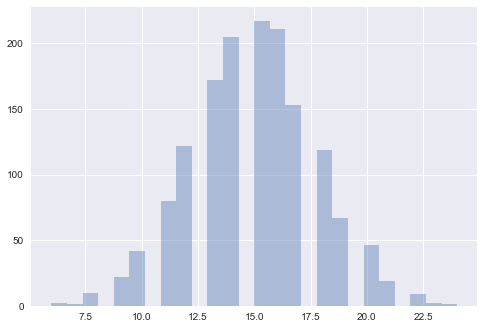

In [23]:
sns.distplot(heads_count_1500, kde=False)

아래 그래프는 커널밀도추정(kde = kernel density estimation) 기법을 적용하여 데이터를
보다 이해하기 쉽도록 도와주는 그래프를 함께 보여준다.

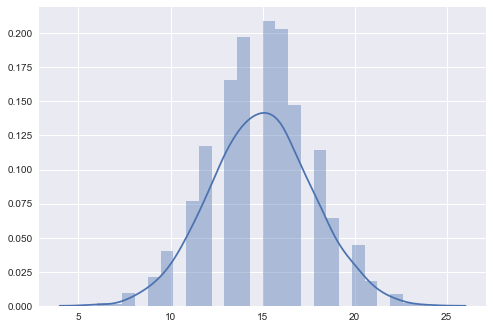

In [24]:
sns.distplot(heads_count_1500, kde=True)

1500번의 모의실험에서 앞면이 24회 이상 나온 실험이 몇 번인지를 확인해보자.
앞서 사용한 기술인 마스크 인덱싱 기술을 활용한다.

**주의:** 앞서 이론적으로 살펴보았을 때 1500번 정도 실험해야 한 번 정도 볼 수 있다고 결론지었음을 기억하라.

In [25]:
# 앞면이 24회 이상 나오는 경우들의 어레이

mask = heads_count_1500>=24
heads_count_1500[mask]

array([24])

이론적으로 예상한 대로 동전을 30번 던져서 앞면이 24회 이상 나온 경우가 한 번 나왔다.

이제 위 모의실험을 10,000번 반복해보자.

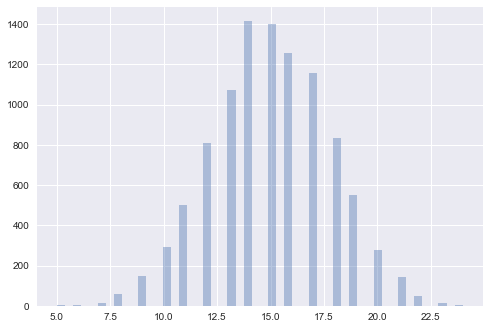

In [26]:
heads_count_10000 = coin_experiment(10000)
sns.distplot(heads_count_10000, kde=False)

In [27]:
# 앞면이 24회 이상 나오는 경우들의 어레이

mask = heads_count_10000>=24
heads_count_10000[mask].shape[0]

4

앞서 확률적으로 0.0007%, 즉 10,000번에 7번 정도 나와야 한다고 이론적으로 계산한 결과와 비슷한 결과가 나온다는 것을 위 실험을 반복적으로 실행하면서 확인해볼 수 있다.

## 정상적인 동전인가?

모의실험의 결과 역시 동전을 30번 던져서 24번 이상 앞면이 나올 확률이 5%에 크게 미치지 못한다.
이런 경우 우리는 사용한 동전이 정상적인 동전이라는 영가설(H0)을 받아들일 수 없다고 말한다.
즉, 기각해야 한다.

가설검정을 위해 지금까지 다룬 내용을 정리하면 다음과 같다.

## 가설검정 6단계

```
1) 검정할 가설을 결정한다.
    * 영가설: 여기서는 "정상적인 동전이다" 라는 가설 사용
2) 가설을 검증할 때 사용할 통계방식을 선택한다. 
    * 여기서는 이항분포 확률 선택
3) 기각역을 정한다.
    * 여기서는 앞면이 나올 횟수를 기준으로 상위 5%로 정함
    * 앞면이 24번 나올 확률이 5% 이상되어야 인정한다는 의미임.
4) 검정통계를 위한 p-값을 찾는다.
    * 여기서는 모의실험을 이용하여 가설에 사용된 사건이 발생한 확률을 계산.
    * 경우에 따라 이론적으로도 계산 가능
5) 표본결과가 기각역 안에 들어오는지 확인한다.
    * 여기서는 5% 이하인지 확인
6) 결정을 내린다.
    * 여기서는 "정상적인 동전이다" 라는 영가설을 기각함.
```

## 연습문제

### 연습

모의실험 반복을 구현하는 coin_experiment 함수를 for문을 사용하지 않고 구현해보자.

견본답안:

In [28]:
def coin_experiment_2(num_repeat):

    experiment = np.random.randint(0,2,[num_repeat, num_tosses])
    return experiment.sum(axis=1)

In [29]:
heads_count = coin_experiment_2(100000)

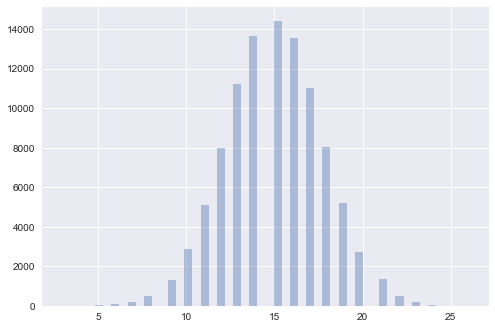

In [30]:
sns.distplot(heads_count, kde=False)

In [31]:
mask = heads_count>=24

In [32]:
heads_count[mask].shape[0]/100000

0.00077

### 연습

numpy.random 모듈에 지금까지 다룬 이항분포 확률을 계산해주는 함수인 binomial이 이미 구현되어 있다.

In [33]:
from numpy.random import binomial

아래 코드는 B(30, 0.5)를 따르는 확률변수를 10,000번 반복한 결과를 보여준다.

In [34]:
an_experiment = binomial(30, 0.5, 10000)
an_experiment

array([18, 11, 14, ..., 14, 22, 15])

위 결과를 이용하여 앞서 분석한 결과와 유사한 결과를 얻는다는 것을 확인할 수 있다.

In [35]:
an_experiment[an_experiment>=24].shape[0]

6